# Working with pixel data
In this example I explain how to work with pixel data using the nordicMEDiVA Python library.

First, I'll show how to create new series before I go on to show how to set the pixel data in the series.

But first some basics...

## The nordicMEDiVA Series Object
The series object can be tought of as a 4D array of numbers with some special meta data attached to them (the DICOM header).
The series is arranged in the order of [Volume, Slice, Row, Column], so that the following are true:

```
mySeries[i]          -returns-> Volume
mySeries[i][j]       -returns-> Slice
mySeries[i][j][k]    -returns-> Row
mySeries[i][j][k][l] -returns-> Pixel value (float)
```

>**The Series object is therefore a container of Volumes, which in turn is a container of Slices, which contains Rows, which contain pixels.**


Lets get started by doing some imports and defining the input data.


In [21]:
import sys
import medivapylib as mpl
import numpy as np

dicomIn = "./in"    # The path to the input
dicomOut = "./out"  # The path to where the output will be placed
dicomInPreproc = "" # Don't worry about this one for now
instanceUUID = ""   # Don't worry about this one for now

# Get the input
dataIn = mpl.Input(dicomIn, dicomInPreproc, instanceUUID)
inputSeries = dataIn[0]

## Creating a new series
We will in this example create two empty series based on the input. The newly created series have the following properties:
* Relevant DICOM headers are copied from the input series
* All voxels are zero-valued
* The dimension (volumes, slices, rows, colums) are the same

In [22]:
outputSeries1 = mpl.SeriesCreator().createEmptySeries(inputSeries)
outputSeries2 = mpl.SeriesCreator().createEmptySeries(inputSeries)

## Setting the pixel data
There are a couple of ways to set the pixel data. the code should be self explanatory.

In [23]:
# Method 1:
numVolumes = inputSeries.getVolumeCount()
numSlices = inputSeries.getSlicesPerVolumeCount()
numRows = inputSeries.getRowCount()
numColumns = inputSeries.getColumnCount()
for v in range(numVolumes):
    volumeObj = outputSeries1[v] # Get the Volume object at index v
    for s in range(numSlices):
        sliceObj = volumeObj[s] # Get the Slice object at index s
        for r in range(numRows):
            rowObj = sliceObj[r]
            for c in range(numColumns):
                rowObj[c] = np.random.random()
                # NOTE! The above is equivalent to saying
                # outputSeries1[v][s][r][c] = np.random.random()
                # but by extracting each object yields much faster
                # processing times
        
# Method 2:
for v in range(numVolumes):
    for s in range(numSlices):
        # NOTE! The pixelData array needs to be flat!
        pixelData = np.random.random((numRows, numColumns)).flatten()
        outputSeries2[v][s].setPixelData(pixelData)


## Generating output
Generate DICOM output at the `dicomOut` path. Second argument of the add function is the series description of the output series.

In [24]:
dataOut = mpl.Output(dicomOut, instanceUUID)
dataOut.add(outputSeries1, "OutoutSeries1")
dataOut.add(outputSeries2, "OutoutSeries2")

## Do some plotting to display the results
As we can see, the output is a series where each pixel is assigned a random value.

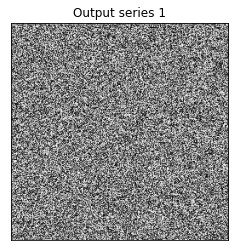

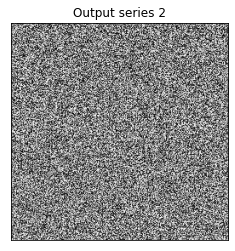

In [25]:
import matplotlib.pyplot as plt

def show_slice(series, volumeIndex, sliceIndex, title=""):
    rowCount = series.getRowCount()
    columnCount = series.getColumnCount()
    fig, axs = plt.subplots(1,1)
    axs.imshow(series[volumeIndex][sliceIndex].getPixelData().reshape((rowCount, columnCount)), cmap="gray")
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(title)

show_slice(outputSeries1, 0, 0, "Output series 1")
show_slice(outputSeries2, 0, 0, "Output series 2")

plt.show()